# Aprendizaje Supervisado - Regresión Lineal

Busca estimar la línea recta $y=𝑤_0+𝑤_1x$, tal que se minimice la suma de los errores al cuadrado. Tal como lo muestra la imagen a continuación:

![Regresión Lineal](imagenes/RegresionLineal.jpg)

In [1]:
%matplotlib inline

import numpy as np    #Para el manejo de arreglos
import pandas as pd   #Para el manejo de conjuntos de datos, tratados como tablas
import seaborn as sea #Para la construcción y visualización de gráficos
import matplotlib.pyplot as plt #Pra la construcción de gráficos

from sklearn.linear_model import LinearRegression # Regresion lineal teórica
from sklearn.linear_model import SGDRegressor #Regregsión lineal uando gradiente descendente estocástico
from sklearn import metrics #Las métricas de rendimiento de un clasificador
from sklearn import model_selection #Para el particionamiento de los conjuntos de datos

## 1. Conjunto de Datos de Prueba 

Iniciamos creando un conjunto de datos de prueba (un ***toy dataset***). Este conjunto de datos se crea con base en la ecuación $y = 4+3x$.

Tenga presente que el método de regresión linela nos permite estimar los parámetros de la recta del modelo, que para este caso deberían ser: $𝑤_0=4$ y $𝑤_1=3$.

In [2]:
#Generamos 100 valores aleatorios en el rango de [0, 2)
X = 2 * np.random.rand(100, 1)

#Usando la ecuación y = 4 + 3x + ruido Gaussiano, generamos los valores de la varaible de salida
y = 4 + 3 * X + np.random.randn(100, 1)

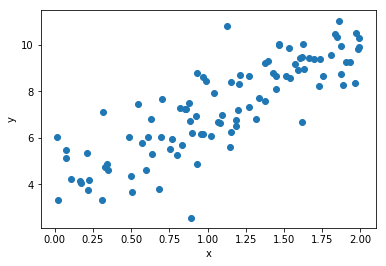

In [3]:
#Mostramos el conjunto de puntos generados
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Teóricamente, el método de regresión lineal tiene sentido cuando una de las variables depende de la otra. Esto lo podemos comprobar calculando el coeficiente de corelación.

In [4]:
#Para calcular el coeficiente de correlación debemos vectores fila, por eso usamos la transpuesta de cada vector
np.corrcoef(X.T, y.T)

array([[1.        , 0.83630544],
       [0.83630544, 1.        ]])

<div style="padding:10px; border-radius:10px; border:2px solid #A43D39; background:#EEEEEE">
<span style="color:#A43D39"><h3>**Nota:**</h3></span> Observe que el valor obtenido para del coeficiente de correlación es un valor baste alto (cercano a 1), lo que nos indica que hay una correlación positiva entre las dos variables.</div>

## 2. Regresión lineal usando Algebra Lineal

En este caso la solución cerrada (o analítica) consiste en resolver la siguiente ecuacuón:<br/><br/>

<span halign="center"> $W = (X^TX)^{-1}X^Ty$ </span>

In [5]:
#Para usar este método lo primero que hacemos es agregar un columna de 1's
#Esto es necesario para compesar la variable x0 (que no existe) que multiplica al parámetro w0
X_b = np.c_[np.ones((100, 1)), X]

#Ecuación de la solución para encontrar W
W = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print('Parámetros de la recta: \n\t w0 = %.2f'%W[0], "\n\t w1 = %.2f"%W[1])

Parámetros de la recta: 
	 w0 = 3.96 
	 w1 = 3.05


<div style="padding:10px; border-radius:10px; border:2px solid #A43D39; background:#EEEEEE">
<span style="color:#A43D39"><h3>**Nota:**</h3></span> Analice los parámetros obtenidos, ¿son los que esperabamos?.</div>

Usemos los parámetros para predecir el valor de y para dos puntos en X:

In [7]:
#Creamos dos valores de X para predecir sus y's respectivas
X_new = np.array([[0], [2]])

#No debemos olvidar agregar la columna de 1's del intercepto
X_new_b = np.c_[np.ones((2, 1)), X_new]

#Realizamos la predicción con el vector de parámetros W
y_predict = X_new_b.dot(W)

y_predict

array([[ 3.95758688],
       [10.0621949 ]])

Usemos esos dos puntos para pintar la línea recta estimada por el modelo:

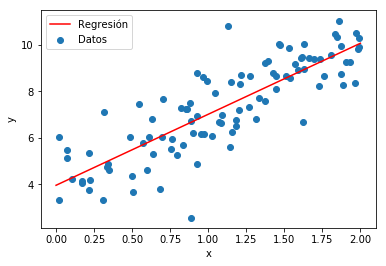

In [8]:
#Mostramos el conjunto de entrenamiento y la recta de la regresión (usando dos puntos de la misma)
plt.scatter(X, y, label='Datos')
plt.plot(X_new, y_predict, "r-", label='Regresión')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## 3. Regresión lineal usando estadística

En este caso el modelo se estima dando solución directar al intercepto y a la pendiente de la recta así:
![Ecuaciones estadísticas](imagenes/f1.png)

Veámos como hacerlos en Python

In [9]:
#Calcula la covarianza
cov_xy = np.cov(X.T, y.T, ddof=0)[0, 1]

#Calcula la varianza para X
var_x = np.var(X, ddof=0)

#Encuentra los parámetros
w1 = cov_xy / var_x
w0 = np.mean(y) - w1*np.mean(X)

print('Parámetros de la recta: \n\t w0 = %.2f'%w0, "\n\t w1 = %.2f"%w1)

Parámetros de la recta: 
	 w0 = 3.96 
	 w1 = 3.05


## 4. Regresaión lineal teórica usando Sklearn 

En el caso de querer usar los métodos de regresión lineal de <span style="color:blue; font-family:Courier new">Sklearn</span> tenemos varias formas de hacerlo. La más común es usar la regresión lineal ordinaria <span style="color:blue; font-family:Courier new">LinearRegression</span>, tal como se muestra a continuación.

In [10]:
#Especifiamos el modelo a usar
lr = LinearRegression()

#Entrenamos el modelo
lr.fit(X, y)

#Mostramos los parámetros del modelo
print('Parámetros de la recta: \n\t w0 = %.2f'%lr.intercept_, "\n\t w1 = %.2f"%lr.coef_)

Parámetros de la recta: 
	 w0 = 3.96 
	 w1 = 3.05


In [11]:
#Usamos el modelo entrenado para predecir el valor de Y para los 2 puntos de X antes creados
y_predicted = lr.predict(X_new)

print("Valores estimados:")
print ("x1=",X_new[0], "y1=",y_predicted[0])
print ("x2=",X_new[1], "y2=",y_predicted[1])

Valores estimados:
x1= [0] y1= [3.95758688]
x2= [2] y2= [10.0621949]


## 5. Regresión lineal usando optimización con Sklearn

En este caso usamos una clase llamada <span style="color:blue; font-family:Courier new">SGDRegressor</span> la cual implementada una búsqueda usando el algoritmo de Gradiente Descendente Estocástico.

Veámos como usarlo.

In [12]:
#Especifiamos el modelo a usar
lr_sgd = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
lr_sgd.fit(X, y.ravel())

#Mostramos los parámetros del modelo
print('Parámetros de la recta: \n\t w0 = %.2f'%lr.intercept_, "\n\t w1 = %.2f"%lr.coef_)

Parámetros de la recta: 
	 w0 = 3.96 
	 w1 = 3.05


## 6. Un Ejercicio de Regresión Lineal Múltiple

En las secciones anteriores realizamos una regresión lineal considerando solo dos variables. Sin embargo, casi todos los problemas del mundo real tiendenn a tener más de dos variables. La regresión lineal que involucra múltiples variables se llama "regresión lineal múltiple" o regresión lineal multivariante. 

Los pasos para realizar una regresión lineal múltiple son similares a los de la regresión lineal simple y para verlo vamos a trabajar con un conjunto de datos bastante conocido el cual busca predecir la calidad del vino. Esepcíficamente, el conjunto de datos es de algunas variantes de vino tinto, pero por cuestiones de privacidad sólo están disponibles las variables fisicoquímicas (entradas) y sensoriales (la salida). El conjunto de datos no tiene información sobre los varietales, las marcas de vinos, ni sus precios, etc.

Entre las variables de entrada están: acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos, alcohol. Sobre la base de estas características, predeciremos la calidad del vino.

Ahora,empecemos a codificar.

### 6.1 Lectura del conjunto de datos

Iniciamos cargando el conjunto de datos el cual están en format CSV.

In [13]:
#Leemos el conjunto de datos como un DataFrame
dataset = pd.read_csv('datos/winequality.csv')

### 6.2 Exploración del conjunto de datos

En la exploración debemos tratar de conocer el conjunto de datos.Primero veamos sus dimensiones.

In [14]:
#Inciamos mostrando las dimensiones del conjunto de datos
dataset.shape

(1599, 12)

La salida anterior nos indica que el conjunto de datos tiene 1599 filas y 12 columnas. Ahora veamos las estadísticas básicas del conjunto de datos usando el comamdo <span style="color:blue; font-family:Courier new">describe()</span>.

In [15]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 6.3 Limpieza del conjunto de datos

Como el conjunto de datos puede tener valores NaN debemos identificar si hat columnas que los tenga para proceder a hacer la limpieza.

In [16]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Podemos ver que todas las columnas dan <span style="color:green; font-family:Courier new">False</span>. Si hubiesemos tenido alguna columna con un resultado <span style="color:green; font-family:Courier new">True</span> deberiamos eliminar los valores NaN, por ejemplo usando la instrucción:

In [17]:
dataset = dataset.fillna(method='ffill')

### 6.4 Obteniendo la matriz de datos y el vector de etiquetas

Lo siguiente es dividir los datos que corresponden a las variables independietes (`X`) y la variable dependiente (`y`). Así la variable `X` contiene todos los atributos (o características) y la variable `y` contiene etiquetas.

In [18]:
#Hay dos formas de hacerlo: usando los nombres de las columnas
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = dataset['quality'].values

#Usando la notación de recorrido de matrices de numpy
X = dataset.values[:,:-1]
y = dataset.values[:,-1]

Veámos el histograma de frecuencias de la calidad (nuestra variable objetivo)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


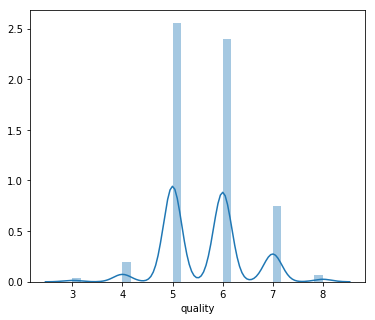

In [19]:
plt.figure(figsize=(6,5))
plt.tight_layout()

#Muestra el histograma de frecuencias y la PDF
sea.distplot(dataset['quality'], kde=True, hist=True )

Como podemos observar, la mayoría de vinos tienen una calidad de 5 o 6.

### 6.5 Particionamiento del conjunto de datos

Ahora dividimos el conjunto usando el 80% de los datos para entrenamiento y 20% para probar el modelo que se genera.

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

### 6.6 Entrenamiento del modelo

Ahora procedemos a entrenar el modelo de regresión simple.

In [22]:
#Especifiamos el modelo a usar
lr = LinearRegression()

#Entrenamos el modelo
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Como se mencionó, en el caso de la regresión lineal multivariable, el modelo de regresión tiene que encontrar los coeficientes óptimos para todos los atributos. 

Para ver qué coeficientes ha elegido el modelo de regresión hacemos lo siguiente:

In [23]:
#Mostramos los parámetros del modelo
coef = pd.DataFrame(lr.coef_, dataset.columns[:-1], columns=['Coefficient'])  
coef

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


Esto significa que para una unidad de aumento en la "Density", hay una disminución de 31.51 unidades en la calidad del vino. Del mismo modo, una disminución de la unidad en "Chlorides" resulta en un aumento de 1.87 unidades en la calidad del vino. Podemos ver que el resto de las características tienen muy poco efecto sobre la calidad del vino.

### 6.7 Evaluando el modelo entrenado

Primero debemos hacer las predicciones sobre los datos de prueba.

In [25]:
y_pred = lr.predict(X_test)
y_pred

array([5.7829301 , 5.03619267, 6.59698929, 5.33912637, 5.93952898,
       5.0072068 , 5.39616171, 6.05211188, 4.86760343, 4.95067572,
       5.28580441, 5.41265269, 5.7057424 , 5.12921737, 5.52885206,
       6.38052412, 6.81012527, 5.73803346, 5.97618825, 5.08613415,
       6.34479863, 5.16400983, 5.64203971, 6.1462903 , 5.4817802 ,
       5.03391406, 5.18721293, 6.48783659, 5.33301372, 6.30458308,
       6.03452293, 5.82849303, 5.58503524, 5.28512701, 5.75656128,
       6.15273792, 5.14134479, 5.48228021, 6.38983359, 5.7901819 ,
       5.42936928, 6.04810414, 6.70159678, 6.60160183, 5.97253803,
       4.78890763, 5.49565005, 6.01881894, 5.48895041, 6.10824243,
       5.3126164 , 5.28492351, 5.76043226, 6.36081498, 5.7195388 ,
       5.26971928, 5.08498332, 5.31050693, 6.50895816, 5.44323413,
       5.16377401, 5.76427324, 6.0703837 , 6.28933679, 5.07315141,
       6.11874641, 5.35681067, 6.01343647, 6.12184268, 5.98547673,
       5.35327968, 5.4367731 , 5.06017324, 5.58939889, 5.62593

Ahora podemos medir que tan bueno es el modelo, usando en este caso el MSE:

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Mean Absolute Error: 0.46963309286610927
